 # 시계열 분해 

시계열 분해(time series decomposition)는  시계열 자료를 추세(Trend), 계절성(Seasonality), 잔차(Residual)로 분해하는 기법 
 
 ## 시계열 분해 방법 
* (1) 데이터를 보고 시계열의 주기적 반복/계절성이 있는지, 가법 모형(additive model, y = t + s + r)과 승법 모형(multiplicative model, y = t * s * r) 중 무엇이 더 적합할지 판단을 합니다. 

 
* (2) 시계열 자료에서 추세(trend)를 뽑아내기 위해서 중심 이동 평균(centered moving average)을 이용합니다. 

 

* (3) 원 자료에서 추세 분해값을 빼줍니다(detrend). 그러면 계절 요인과 불규칙 요인만 남게 됩니다. 

 

* (4) 다음에 계절 주기 (seasonal period) 로 detrend 이후 남은 값의 합을 나누어주면 계절 평균(average seasonality)을 구할 수 있습니다. (예: 01월 계절 평균 = (2020-01 + 2021-01 + 2022-01 + 2023-01)/4, 02월 계절 평균 = (2020-02 + 2021-02 + 2022-02 + 2023-02)/4). 

 

* (5) 원래의 값에서 추세와 계절성 분해값을 빼주면 불규칙 요인(random, irregular factor)이 남게 됩니다. 

* 시계열 분해 후에 추세와 계절성을 제외한 잔차는 특정 패턴 없이 무작위 분포를 띠고 작은 값이면 추세와 계절성으로 모형화가 잘 이루어 진 데이터임 이는 시계열 자료의 특성을 이해하고 예측하는데 활용할 수 있습니다. 

* 만약 시계열 분해 후의 잔차에 특정 패턴 (가령, 주기적인 파동을 그린다거나, 분산이 점점 커진다거나 등..) 이 존재한다면 잔차에 대해서만 다른 모형을 추가로 적합할 수도 있겠습니다. 



        seasonal_decompose(ts, model='{“additive”, “multiplicative”}, optional)

In [2]:
import pandas as pd

data = pd.read_csv('./data/arima_data.csv', names = ['day','price'])
data.head(3)

,day,price
0,2013-01-01,3794
1,2013-02-01,3863
2,2013-03-01,5190


In [3]:
# object값을 date형식으로 바꿔야 함
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   day     60 non-null     object
 1   price   60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
data['day'] = pd.to_datetime(data['day'],format="%Y-%m-%d")
data.set_index('day', inplace = True)
data.head(3)

,price
day,
2013-01-01,3794
2013-02-01,3863
2013-03-01,5190


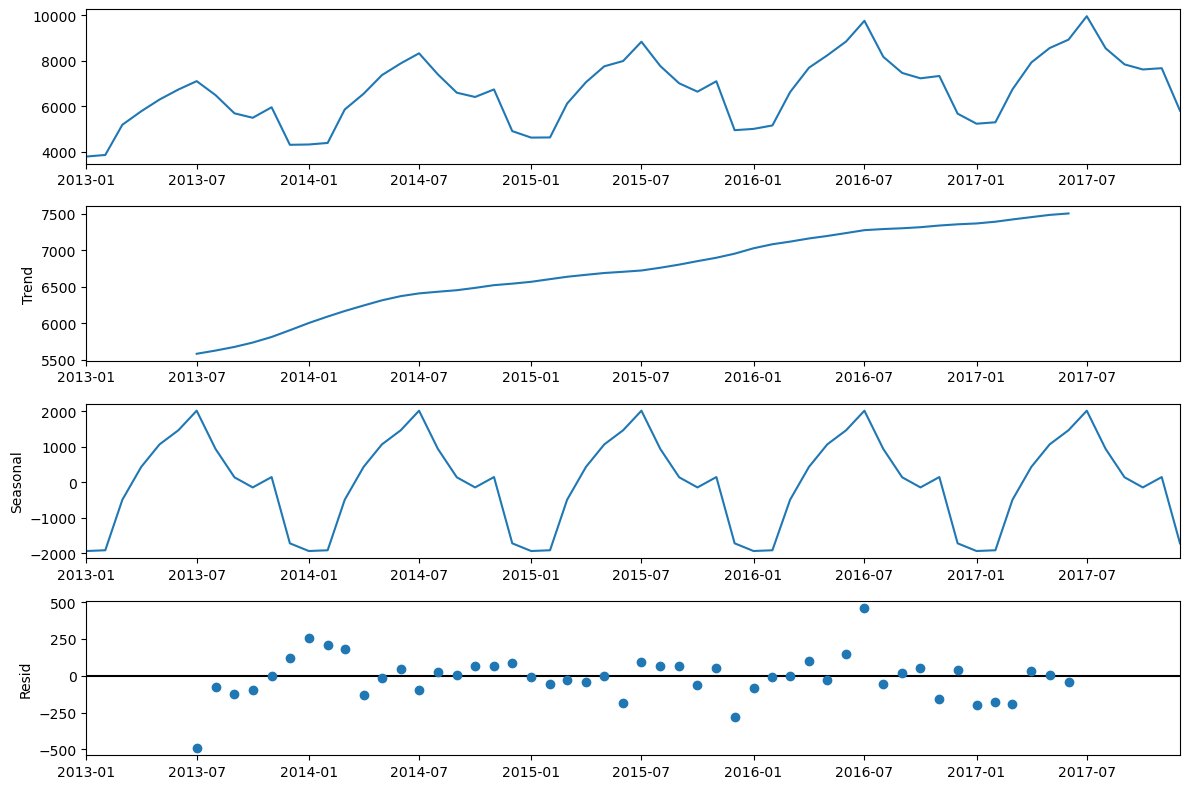

In [10]:
# 시계열 분해
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
%matplotlib inline

ts = data 
result = seasonal_decompose(ts, model='additive')

plt.rcParams['figure.figsize'] = [12,8]
result.plot()
plt.show()